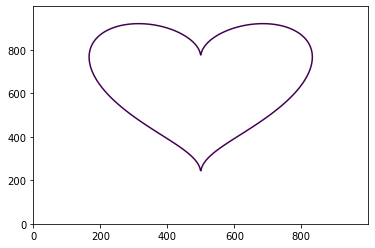

In [11]:
import matplotlib.pyplot as plt
import numpy as np

delta = 0.025
lin = np.linspace(-1.5,1.5,1000)
X, Y = np.meshgrid(lin, lin)

# F is one side of the equation, G is the other
F = X**2
G = 1- (5*Y/4 - np.sqrt(np.abs(X)))**2

plt.contour((F - G), [0])
plt.show()

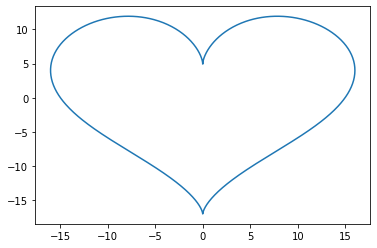

In [12]:
t = np.linspace(0,2*np.pi, 1000)

x = 16*np.sin(t)**3
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)

plt.plot(x,y)

In [80]:
resolution = 100

def Barycentric(p, a, b, c):
    v0 = b - a
    v1 = c - a
    v2 = p - a
    d00 = np.dot(v0, v0)
    d01 = np.dot(v0, v1)
    d11 = np.dot(v1, v1)
    d20 = np.dot(v2, v0)
    d21 = np.dot(v2, v1)
    denom = d00 * d11 - d01 * d01;
    v = (d11 * d20 - d01 * d21) / denom;
    w = (d00 * d21 - d01 * d20) / denom;
    u = 1.0 - v - w;
    return u,v,w

lin = np.linspace(0,1,resolution)
X, Y = np.meshgrid(lin, lin)

p0 = np.array([0.0, 0.0])
p1 = np.array([1.0, 0.0])
p2 = np.array([1.0, 1.0])
p3 = np.array([0.0, 1.0])


color_p0 = np.array([0.0, 0.0, 1.0])
color_p1 = np.array([1.0, 0.0, 0.0])
color_p2 = np.array([0.0, 1.0, 0.0])
color_p3= np.array([1.0, 0.0, 0.0])

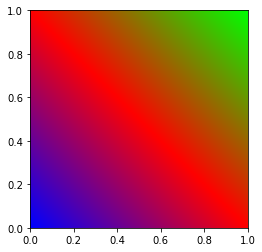

In [81]:
image = np.zeros((resolution, resolution, 3))

for i in range(resolution):
    for j in range(resolution):
        p = np.array([X[i,j], Y[i,j]])
        u,v,w = Barycentric(p, p0, p1, p3)
        if u < 0 or v < 0 or w < 0:
            u,v,w = Barycentric(p, p1, p2, p3)
            image[i,j] = (u*color_p1 + v*color_p2 + w*color_p3)
        else:
            image[i,j] = (u*color_p0 + v*color_p1 + w*color_p3)

plt.imshow(np.flip(image, axis=0), extent=[0,1,0,1])
plt.savefig("first.png", dpi=300)

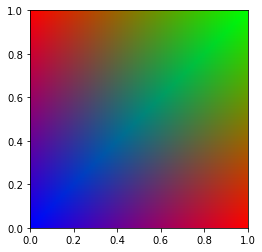

In [82]:
image = np.zeros((resolution, resolution, 3))

for i in range(resolution):
    for j in range(resolution):
        p = np.array([X[i,j], Y[i,j]])
        u,v,w = Barycentric(p, p0, p2, p3)
        if u < 0 or v < 0 or w < 0:
            u,v,w = Barycentric(p, p0, p1, p2)
            image[i,j] = (u*color_p0 + v*color_p1 + w*color_p2)
        else:
            image[i,j] = (u*color_p0 + v*color_p2 + w*color_p3)

plt.imshow(np.flip(image, axis=0), extent=[0,1,0,1])
plt.savefig("second.png", dpi=300)

In [83]:
def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

        >>> bilinear_interpolation(12, 5.5,
        ...                        [(10, 4, 100),
        ...                         (20, 4, 200),
        ...                         (10, 6, 150),
        ...                         (20, 6, 300)])
        165.0

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')

    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)

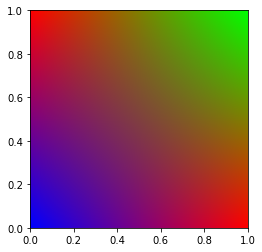

In [84]:
image = np.zeros((resolution, resolution, 3))

n = [(p0[0], p0[1], color_p0),
      (p1[0], p1[1], color_p1),
      (p2[0], p2[1], color_p2),
      (p3[0], p3[1], color_p3),
    ]

for i in range(resolution):
    for j in range(resolution):
        image[i,j] = bilinear_interpolation(X[i,j], Y[i,j], n)


plt.imshow(np.flip(image, axis=0), extent=[0,1,0,1])
plt.savefig("third.png", dpi=300)